In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

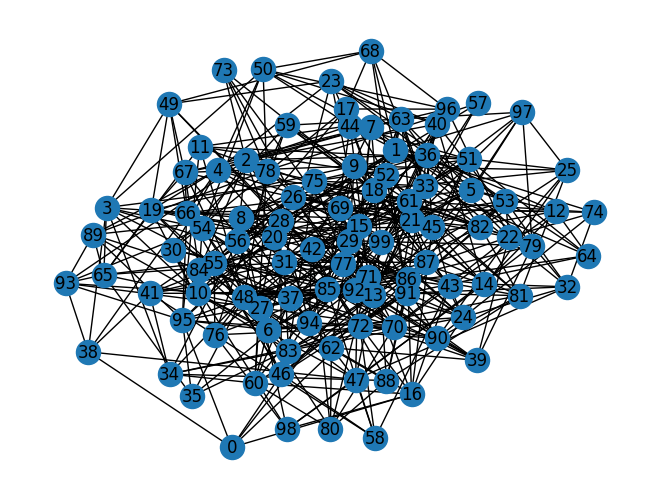

In [12]:
# Parameters for the Erdős-Rényi network
n = 100  # number of nodes
p = 0.1  # probability of edge creation
C = 1    # constant for the Jacobian construction

# Generate an Erdős-Rényi network
G = nx.erdos_renyi_graph(n, p)
nx.draw(G, with_labels=True)
plt.show()

In [13]:
# Degree of each node
degrees = np.array([d for n, d in G.degree()])

# Construct the Jacobian matrix
J = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i == j:
            J[i, j] = C * degrees[i]
        else:
            J[i, j] = degrees[i] * (degrees[j]**2)

In [14]:
# Create a lot of ER networks and their return a list of their Jacobians
def create_ER_Jacobian(n, p, C):
    G = nx.erdos_renyi_graph(n, p)
    degrees = np.array([d for n, d in G.degree()])
    J = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                J[i, j] = C * degrees[i]
            else:
                J[i, j] = degrees[i] * (degrees[j]**2)
    return J

Js = []
for i in range(5):
    Js.append(create_ER_Jacobian(n, p, C))

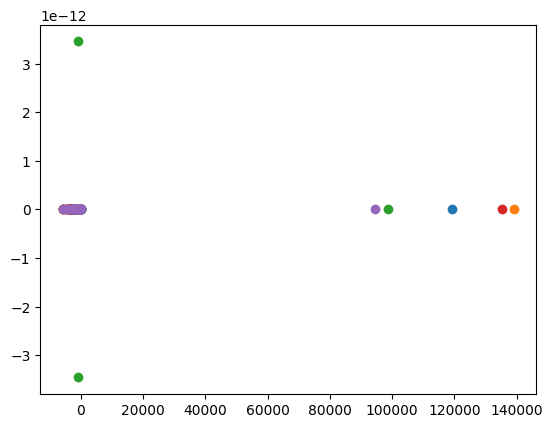

In [15]:
# Plot the Jacobians' eigenvalues on one plot
for J in Js:
    eigs = np.linalg.eigvals(J)
    plt.scatter(eigs.real, eigs.imag)

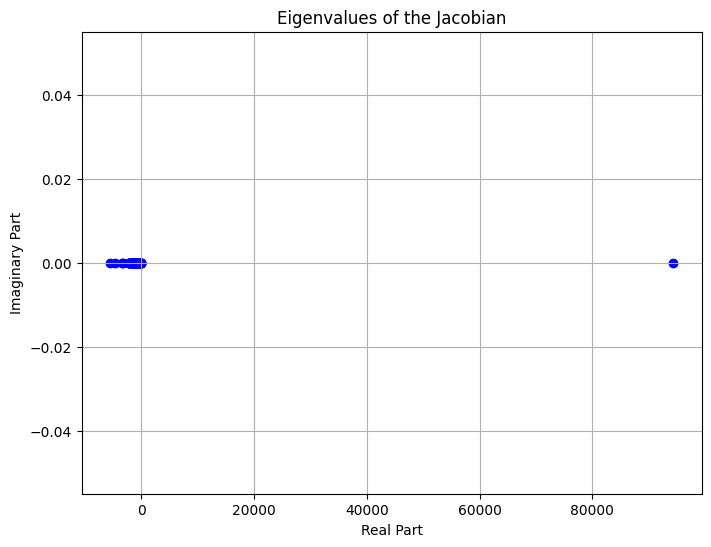

In [16]:
# Calculate the eigenvalues
eigenvalues = np.linalg.eigvals(J)

# Plot the eigenvalues
plt.figure(figsize=(8, 6))
plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), color='blue')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues of the Jacobian')
plt.grid(True)
plt.show()

In [17]:
# Calculate the analytical outlier eigenvalue

# Mean of diagonal elements (which are degrees in the Jacobian)
mean_diagonal = np.mean(np.diag(J))

# Mean of upper triangle elements of A
mean_upper_triangle_J = np.mean(np.triu(J, 1))

# Calculate the outlier eigenvalue analytically
outlier_lambda_analytical = C * mean_diagonal + mean_upper_triangle_J * (n - 1) * p

outlier_lambda_analytical

3935.02875

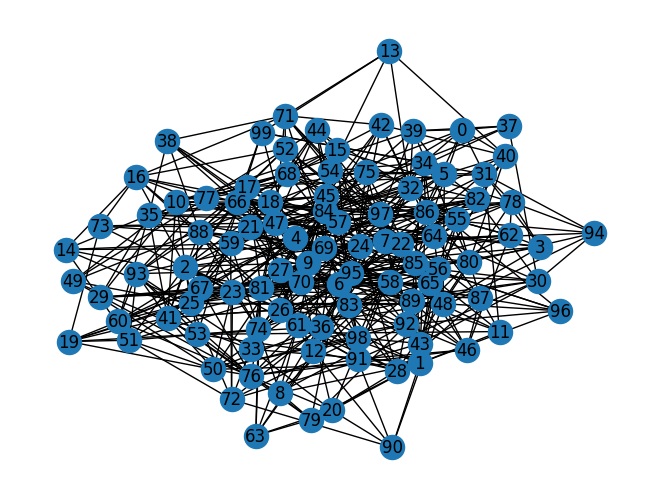

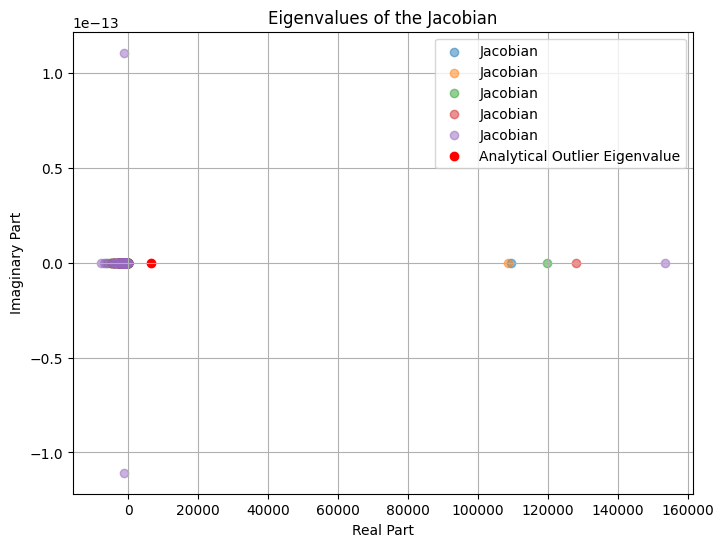

6496.559270000001

In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Erdős-Rényi network
n = 100  # number of nodes
p = 0.1  # probability of edge creation
C = 1    # constant for the Jacobian construction

# Generate an Erdős-Rényi network
G = nx.erdos_renyi_graph(n, p)
nx.draw(G, with_labels=True)
plt.show()

# Degree of each node
degrees = np.array([d for n, d in G.degree()])

# Construct the Jacobian matrix
J = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i == j:
            J[i, j] = C * degrees[i]
        else:
            J[i, j] = degrees[i] * (degrees[j]**2)

# Create a list of Jacobians for multiple ER networks
def create_ER_Jacobians(n, p, C, num_networks):
    Js = []
    for i in range(num_networks):
        G = nx.erdos_renyi_graph(n, p)
        degrees = np.array([d for n, d in G.degree()])
        J = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if i == j:
                    J[i, j] = C * degrees[i]
                else:
                    J[i, j] = degrees[i] * (degrees[j]**2)
        Js.append(J)
    return Js

# Generate Jacobians for multiple networks
Js = create_ER_Jacobians(n, p, C, 5)

# Plot the eigenvalues of Jacobians
plt.figure(figsize=(8, 6))
for J in Js:
    eigs = np.linalg.eigvals(J)
    plt.scatter(eigs.real, eigs.imag, label='Jacobian', alpha=0.5)

# Calculate the analytical outlier eigenvalue
mean_diagonal = np.mean(np.diag(J))
mean_upper_triangle_J = np.mean(np.triu(J, 1))
outlier_lambda_analytical = C * mean_diagonal + mean_upper_triangle_J * (n - 1) * p

# Plot the analytical outlier eigenvalue
plt.scatter(np.real(outlier_lambda_analytical), np.imag(outlier_lambda_analytical), color='red', label='Analytical Outlier Eigenvalue')

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues of the Jacobian')
plt.legend()
plt.grid(True)
plt.show()

outlier_lambda_analytical
